In [93]:
import cirq

# Create a 3-qubit circuit
circuit = cirq.Circuit()

# Define qubits
q1 = cirq.LineQubit(0)
q2 = cirq.LineQubit(1)
q3 = cirq.LineQubit(2)

# Apply CNOT gates
circuit.append(cirq.CNOT(q1, q2))  # CNOT(q1, q2)
circuit.append(cirq.CNOT(q1, q3))  # CNOT(q1, q3)

# Create a moment with the three Hadamard gates
hadamard_moment = cirq.Moment([cirq.H(q1), cirq.H(q2), cirq.H(q3)])
circuit.append(hadamard_moment)

# Attach a Z gate to qubit 2 (target qubit)
circuit.append(cirq.Z(q2))  # Z(q2)

#Attach a moment with the three Hadamard gates
hadamard_moment = cirq.Moment([cirq.H(q1), cirq.H(q2), cirq.H(q3)])
circuit.append(hadamard_moment)

# Apply CNOT gates
circuit.append(cirq.CNOT(q1, q3))  # CNOT(q1, q2)
circuit.append(cirq.CNOT(q1, q2))  # CNOT(q1, q3)

#Apply Toffoli gate
# Apply Toffoli gate
circuit.append(cirq.TOFFOLI(q1, q2, q3))  # Toffoli gate (CCX)

print(circuit)


0: ───@───@───H───────H───@───@───@───
      │   │               │   │   │
1: ───X───┼───H───Z───H───┼───X───@───
          │               │       │
2: ───────X───H───────H───X───────X───


In [94]:
import numpy as np

# Define the CNOT gate matrix
CNOT = np.array([[1, 0, 0, 0],[0, 1, 0, 0], [0, 0, 0, 1],[0, 0, 1, 0]])


# Define the Hadamard gate matrix
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

#We want to dot product the gates in series and tensor product the gates in paralell
term0 = np.dot(CNOT, CNOT)
term1 = np.dot(CNOT, term0)
term2 = np.kron(H,H)
term3 = np.kron(term2,H)
term4 = np.dot(term1,term2)
print(term4)

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5 -0.5]]


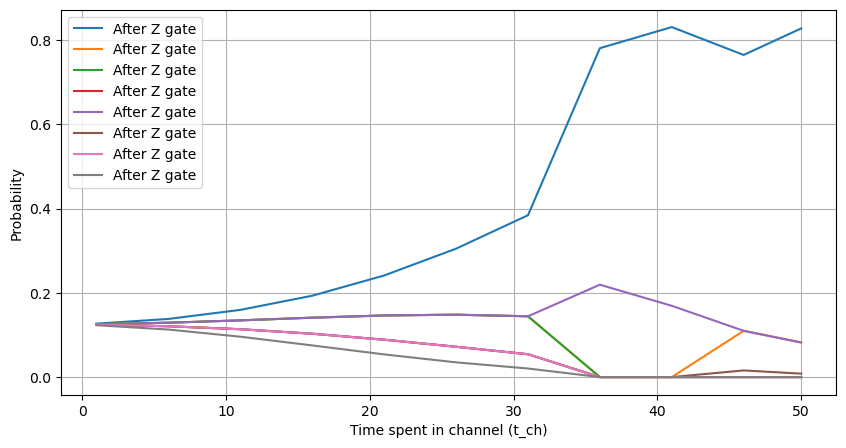

In [95]:
# Given probabilities and time intervals
p_z = np.array([0.00987, 0.0558, 0.0974, 0.135, 0.169, 0.199, 0.227, 0.252, 0.275, 0.295, 0.309])
t_ch = np.array([1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 50])

# The existing circuit
circuit = cirq.Circuit()
q1 = cirq.LineQubit(0)
q2 = cirq.LineQubit(1)
q3 = cirq.LineQubit(2)
circuit.append(cirq.CNOT(q1, q2))
circuit.append(cirq.CNOT(q1, q3))
hadamard_moment = cirq.Moment([cirq.H(q1), cirq.H(q2), cirq.H(q3)])
circuit.append(hadamard_moment)
circuit.append(cirq.Z(q2))

# Initialize an empty list to store the probabilities after the Z gate
probabilities_after_Z = []

# Apply the Z error channel for each p_z and t_ch
for p, t in zip(p_z, t_ch):
    # Apply the Z error channel to each qubit
    for qubit in [q1, q2, q3]:
        # Add the Z error channel to the circuit
        circuit.append(cirq.amplitude_damp(p).on(qubit))

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # Store the probabilities after the Z gate
    probabilities_after_Z.append(np.abs(result.final_state_vector)**2)

# Plot the probabilities
plt.figure(figsize=(10, 5))
plt.plot(t_ch, probabilities_after_Z, label='After Z gate')
plt.xlabel('Time spent in channel (t_ch)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

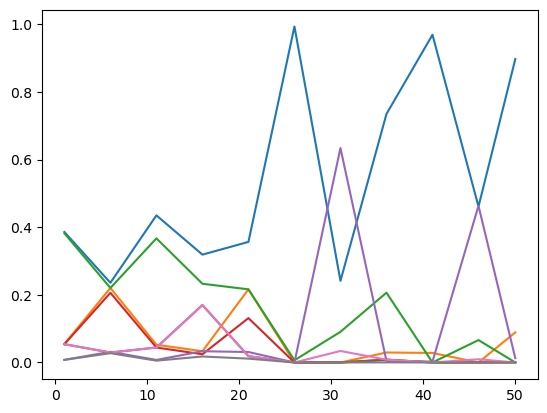

In [96]:
# Reset the circuit to its state after the Z gate
circuit = circuit[:-3]

# Continue with the rest of the circuit
hadamard_moment = cirq.Moment([cirq.H(q1), cirq.H(q2), cirq.H(q3)])
circuit.append(hadamard_moment)
circuit.append(cirq.CNOT(q1, q3))
circuit.append(cirq.CNOT(q1, q2))
circuit.append(cirq.TOFFOLI(q1, q2, q3))

# Initialize an empty list to store the probabilities after the Toffoli gate
probabilities_after_Toffoli = []

# Apply the Z error channel for each p_z and t_ch
for p, t in zip(p_z, t_ch):
    # Apply the Z error channel to each qubit
    for qubit in [q1, q2, q3]:
        # Add the Z error channel to the circuit
        circuit.append(cirq.amplitude_damp(p).on(qubit))

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)

    # Store the probabilities after the Toffoli gate
    probabilities_after_Toffoli.append(np.abs(result.final_state_vector)**2)

plt.plot(t_ch, probabilities_after_Toffoli, label='After Toffoli gate')
plt.show